EXP 6: For a given dataset of size NxM, with n number of samples and M number of features. Design a Bayesian classifier, to classify the test dataset. Divide the data set in train and test (according to random %age fit)

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Importing the data

In [79]:
data = pd.read_csv('Exp_Dataset.csv')

In [80]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F1016,F1017,F1018,F1019,F1020,F1021,F1022,F1023,F1024,Class
0,832.00,848.00,855.75,864.00,864.00,872.13,896.00,928.00,928.00,944.00,...,1016.00,1016.00,1000.00,976.38,944.000,936.00,919.63,935.75,906.75,Yes
1,911.88,920.13,911.00,911.75,879.75,880.00,896.00,904.00,919.75,926.00,...,825.38,847.75,880.00,848.25,832.000,856.00,880.00,889.00,864.00,Yes
2,679.00,656.00,688.00,728.00,776.00,824.25,863.88,888.00,896.00,864.25,...,1136.30,1111.60,1055.80,1016.00,1007.900,984.38,936.00,928.00,919.88,Yes
3,1032.00,1040.00,1056.00,1095.80,1056.10,1061.80,1240.40,1318.10,1350.00,1365.90,...,1526.00,1479.90,1429.40,1392.00,1381.900,1360.50,1320.00,1278.40,1264.00,Yes
4,1000.30,1008.30,1015.80,1056.30,1079.80,1080.30,992.00,1087.80,1168.30,1175.80,...,983.75,1090.30,1079.90,1064.00,1081.600,1031.50,1040.30,1041.10,1040.00,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,3.75,580.13,1488.30,1448.00,1416.00,1384.00,1368.00,1336.60,1296.00,1264.00,...,1208.00,1207.80,1192.00,1208.30,1216.000,1208.00,1208.00,1200.10,1200.40,No
1016,920.00,935.88,903.88,888.00,872.13,880.00,856.25,832.00,840.13,856.00,...,856.63,776.00,783.00,551.63,13.875,1.00,0.00,0.00,0.00,No
1017,1152.30,1160.00,1143.80,1160.30,1175.50,1208.00,1208.00,1208.00,1168.00,1184.00,...,911.88,936.25,952.25,952.00,928.250,904.00,888.00,880.13,856.25,No
1018,576.25,600.25,600.00,632.38,656.25,680.00,712.00,735.75,776.38,808.25,...,759.75,760.00,760.38,759.63,744.000,753.00,752.00,743.75,750.13,No


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Columns: 1025 entries, F1 to Class
dtypes: float64(1024), object(1)
memory usage: 8.0+ MB


In [82]:
data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F1015,F1016,F1017,F1018,F1019,F1020,F1021,F1022,F1023,F1024
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,1032.647083,1042.301706,1051.997745,1064.753951,1080.138255,1095.948902,1111.177216,1123.482833,1136.943804,1148.752833,...,1141.260578,1133.364578,1124.812882,1116.940853,1105.480853,1092.773632,1081.181471,1067.241446,1046.867931,1027.270745
std,246.706489,240.903278,235.699238,232.226526,229.366204,224.980927,223.371617,221.961405,220.824050,219.356992,...,226.449482,227.533446,228.838855,228.814706,231.967009,237.179701,241.639430,253.159732,278.577484,305.567418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,919.597500,919.880000,927.937500,936.597500,952.187500,967.720000,975.970000,984.000000,1000.300000,1024.000000,...,1004.775000,993.505000,991.380000,976.250000,968.220000,959.750000,944.407500,936.000000,933.312500,918.345000
50%,1055.950000,1064.000000,1071.950000,1080.000000,1092.150000,1110.750000,1125.950000,1128.250000,1144.100000,1152.200000,...,1143.850000,1136.100000,1128.200000,1127.700000,1112.100000,1104.200000,1092.400000,1088.000000,1080.000000,1079.600000
75%,1191.825000,1199.900000,1205.725000,1224.000000,1238.325000,1256.025000,1272.025000,1280.975000,1296.300000,1303.900000,...,1302.150000,1290.025000,1279.850000,1266.550000,1255.825000,1247.650000,1234.100000,1224.000000,1216.150000,1208.150000
max,1735.900000,1735.900000,1727.600000,1704.000000,1679.900000,1640.000000,1648.000000,1712.100000,1752.000000,1696.100000,...,1921.900000,1927.600000,1920.500000,1896.800000,1880.300000,1838.000000,1837.000000,1831.800000,1840.000000,1837.000000


In [83]:
data.shape

(1020, 1025)

In [84]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])
  
data['Class'].unique()

array([1, 0])

In [85]:
from sklearn.preprocessing import Normalizer

In [86]:
x = data.iloc[: , :-1]

y = data.iloc[: , -1]

In [87]:
x.shape, y.shape

((1020, 1024), (1020,))

In [88]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1015    0
1016    0
1017    0
1018    0
1019    0
Name: Class, Length: 1020, dtype: int64

In [89]:
norm = Normalizer()
columns = x.columns
x_norm = norm.fit_transform(x)
x_norm = pd.DataFrame(x_norm, columns = columns)
x_norm.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F1015,F1016,F1017,F1018,F1019,F1020,F1021,F1022,F1023,F1024
0,0.024169,0.024634,0.024859,0.025099,0.025099,0.025335,0.026029,0.026958,0.026958,0.027423,...,0.028585,0.029515,0.029515,0.029050,0.028364,0.027423,0.027191,0.026715,0.027183,0.026341
1,0.030458,0.030734,0.030429,0.030454,0.029385,0.029393,0.029928,0.030195,0.030721,0.030930,...,0.029114,0.027569,0.028316,0.029393,0.028333,0.027790,0.028592,0.029393,0.029694,0.028859
2,0.018952,0.018310,0.019204,0.020320,0.021660,0.023007,0.024113,0.024786,0.025009,0.024123,...,0.034193,0.031717,0.031027,0.029470,0.028359,0.028133,0.027476,0.026126,0.025903,0.025676
3,0.022089,0.022260,0.022602,0.023454,0.022604,0.022726,0.026549,0.028212,0.028895,0.029235,...,0.033739,0.032662,0.031675,0.030594,0.029794,0.029578,0.029120,0.028253,0.027362,0.027054
4,0.025021,0.025221,0.025409,0.026422,0.027009,0.027022,0.024813,0.027210,0.029223,0.029411,...,0.024426,0.024607,0.027272,0.027012,0.026614,0.027054,0.025801,0.026021,0.026041,0.026014


In [90]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1015    0
1016    0
1017    0
1018    0
1019    0
Name: Class, Length: 1020, dtype: int64

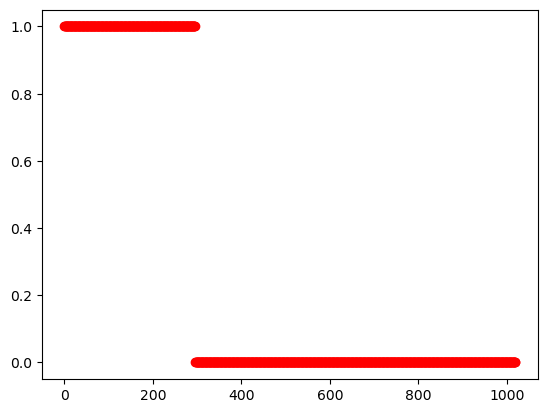

In [91]:
plt.scatter(np.arange(1020), y, c='r', marker='o')

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((816, 1024), (204, 1024), (816,), (204,))

In [93]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [94]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 57.353


In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm

array([[90, 64],
       [23, 27]])

<AxesSubplot:>

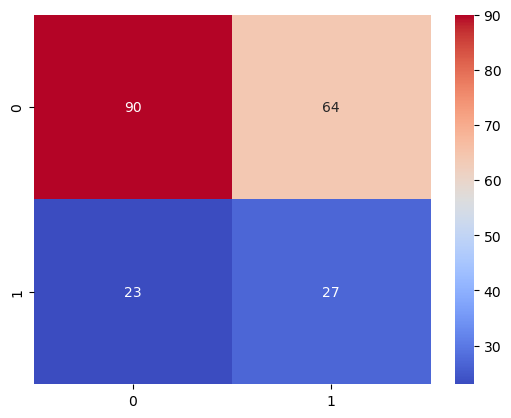

In [105]:
sns.heatmap(cm, annot=True, cmap = 'coolwarm')